First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non

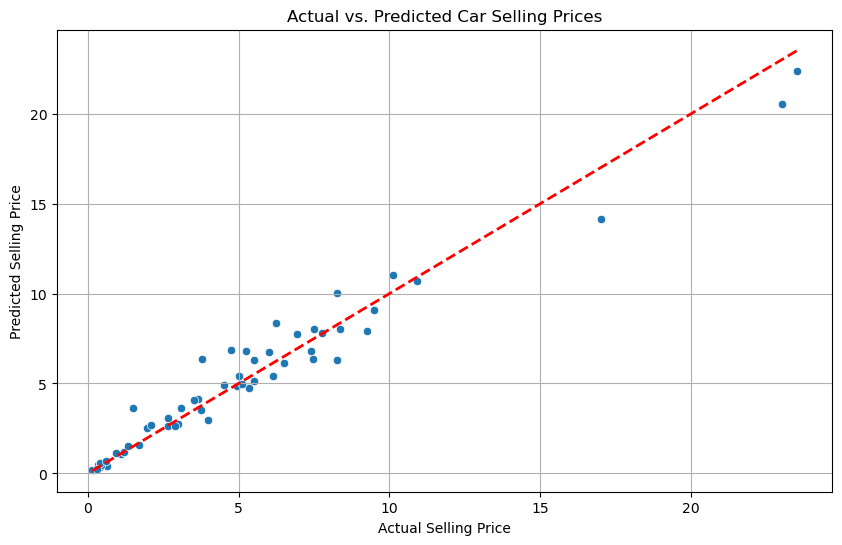

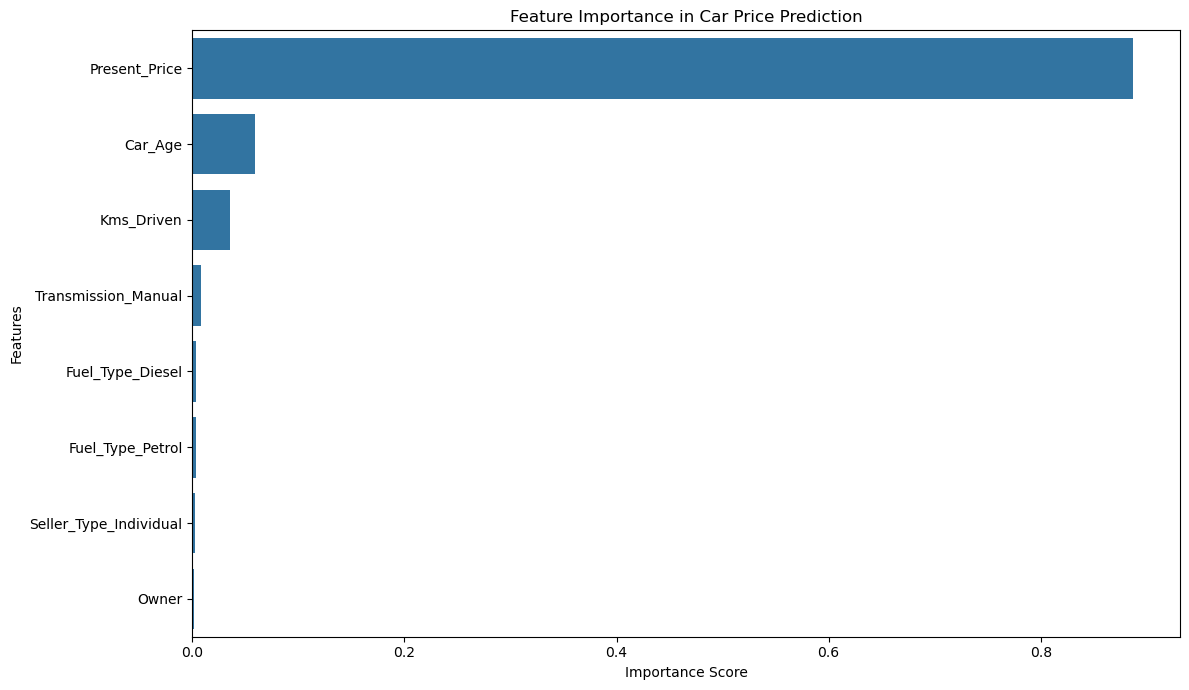

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv(r'/home/rguktrkvalley/Downloads/car.csv')
except FileNotFoundError:
    print("car.csv not found. Please make sure the file is in the correct directory.")
    exit()

# --- Data Preprocessing and Feature Engineering ---

# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
print(df.head())

# Get information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Feature Engineering: Create 'Car_Age' from 'Year'
current_year = 2025
df['Car_Age'] = current_year - df['Year']

# Drop the original 'Year' and 'Car_Name' columns
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Handle categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Display the processed data
print("\nProcessed data with 'Car_Age' and one-hot encoding:")
print(df.head())

# --- Feature and Target Split ---

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# --- Train-Test Split ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Training ---

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# --- Model Evaluation ---

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel R-squared (R2): {r2:.2f}")
print(f"Model Mean Squared Error (MSE): {mse:.2f}")

# --- Visualization ---

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Car Selling Prices")
# Add a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.grid(True)
plt.savefig('car_price_predictions.png')

print("\nA scatter plot of actual vs. predicted prices has been saved as 'car_price_predictions.png'")

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Car Price Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('car_price_feature_importance.png')
print("A bar plot of feature importances has been saved as 'car_price_feature_importance.png'")